In [4]:
#import os
#import sys
#import types
#import noisereduce as nr
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
#from io import BytesIO
#from zipfile import ZipFile
#from botocore.client import Config

from sklearn.model_selection import train_test_split
#from sklearn import svm
from sklearn.metrics import accuracy_score
#import pywt
#from scipy.io import wavfile
import librosa    
import glob
#import cv2
#import wave
#from scipy.fftpack import fft,fftfreq
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers
import keras

%matplotlib inline


In [5]:
audio_data = []
labels = []
sampling_rate = []
file_names = []


In [10]:
#samplerate, data = wavfile.read("dataset/dog/1-30344-A.wav")
data, samplerate = librosa.load("dataset/dog/1-30344-A.wav", sr=44000) # Downsample 44.1kHz to 8kHz

print(data.shape)
print(samplerate)


(220000,)
44000


In [11]:
time_sec = (len(data)/samplerate)
step = time_sec/len(data)
print(time_sec)
print(step)
i=0
time_divion=[]
while i<=time_sec-step:
    
    time_divion.append(i)
    i=i+step
# the fourth second step
four_sec_step_number = (4*len(time_divion))/time_sec
print(four_sec_step_number)

5.0
2.2727272727272726e-05
176000.0


In [12]:
classes = []
label_number=0
audio_data = []
labels = []
sampling_rate = []
file_names = []
data = []
noisy_removed=[]
noise=[]
for filepath in glob.iglob('dataset/*'):
    
    #print(filepath[9:])
    
    #print(filepath)
    classes.append(filepath[8:])

print(classes)

for i in classes:
    print("the class = "+i+", the label = "+str(label_number))
    for j in glob.iglob('dataset/'+i+'/*'):
        #samplerate, data = wavfile.read(j)
        y, s = librosa.load(j, sr=44000) # Downsample 44.1kHz to 8kHz
        #reduced_noise = nr.reduce_noise(audio_clip=y, noise_clip=y, verbose=False)
        #print(s)
        #print(j)
        data.append([y,label_number])
        #noise.append(y)
        #labels.append(label_number)
        
    label_number = label_number + 1
print(len(labels))
#print(labels)



['004 - Baby cry', '005 - Clock tick', '006 - Person sneeze', '007 - Helicopter', '008 - Chainsaw', '009 - Rooster', '010 - Fire crackling', 'dog', 'rain', 'sea']
the class = 004 - Baby cry, the label = 0
the class = 005 - Clock tick, the label = 1
the class = 006 - Person sneeze, the label = 2
the class = 007 - Helicopter, the label = 3
the class = 008 - Chainsaw, the label = 4
the class = 009 - Rooster, the label = 5
the class = 010 - Fire crackling, the label = 6
the class = dog, the label = 7
the class = rain, the label = 8
the class = sea, the label = 9
0


In [13]:
import random

random.shuffle(data)
audio_data=[]
labels=[]
for i,j in data:
    audio_data.append(i)
    labels.append(j)
    


In [14]:
print(labels[0])

0


In [23]:
save_path='roaster_before.jpg'
plt.plot(time_divion[0:192000],audio_data[164][0:192000])
#plt.show()
plt.title('signal in real time')
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
pylab.close()
#plt.plot(time_divion[0:192000],audio_data[4][0:192000])
#plt.show()

In [39]:
example = random.randint(0,400)
mfcc = librosa.feature.mfcc(y=audio_data[example])
print(mfcc.shape)
print(labels[example])

(20, 430)
0


In [28]:
example

351

Text(0.5,1,'Mel Frequency Cepstral Coefficient')

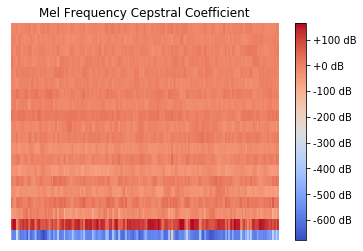

In [29]:

save_path = 'Rooster.jpg'

plt.axis('off') # no axis
librosa.display.specshow(mfcc)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Frequency Cepstral Coefficient')
#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()

In [40]:
mfcc = []
for i in range (0,400):
    if i%100 == 0:
        print(i)
    mf = librosa.feature.mfcc(y=audio_data[i])
    
    mf=mf.reshape(-1,1)
  

    mfcc.append(mf[:8540])
    if mf.shape[0]<8600:
        print(mf.shape)
    
mfcc =np.array(mfcc) 
mfcc.shape

0
(8580, 1)
(8580, 1)
(8540, 1)
100
(8540, 1)
(8560, 1)
200
(8580, 1)
300
(8540, 1)
(8540, 1)


(400, 8540, 1)

In [41]:
mfcc=mfcc.reshape(400,-1)
mfcc.shape


(400, 8540)

In [42]:
from sklearn.preprocessing import MinMaxScaler
data = mfcc
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)


print(np.amax(mfcc))

normalized_features = scaler.transform(data)
print(np.amax(normalized_features))

303.7246
1.0000001


In [43]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.20, random_state=1150)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.425


In [46]:
features_convolution = np.reshape(normalized_features,(400,20, -1,1))

In [47]:
y=keras.utils.to_categorical(labels, num_classes=10, dtype='float32')


In [50]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.2))

#'''
#'''
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(1000))#input_shape=features.shape[1:]
model.add(Dense(64))#input_shape=features.shape[1:]

model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
history = model.fit(features_convolution, y,batch_size=16, epochs=40,validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/20
320/320 [==============================] - 8s 26ms/step - loss: 2.2901 - acc: 0.1281 - val_loss: 2.2221 - val_acc: 0.2625
Epoch 2/20
320/320 [==============================] - 3s 8ms/step - loss: 2.0493 - acc: 0.3031 - val_loss: 1.9956 - val_acc: 0.1500
Epoch 3/20
320/320 [==============================] - 3s 8ms/step - loss: 1.7257 - acc: 0.3938 - val_loss: 1.7125 - val_acc: 0.3375
Epoch 4/20
320/320 [==============================] - 3s 8ms/step - loss: 1.5708 - acc: 0.4219 - val_loss: 1.5557 - val_acc: 0.3875
Epoch 5/20
320/320 [==============================] - 3s 8ms/step - loss: 1.3065 - acc: 0.5188 - val_loss: 1.3943 - val_acc: 0.3875
Epoch 6/20
320/320 [==============================] - 3s 8ms/step - loss: 1.2428 - acc: 0.5375 - val_loss: 1.1600 - val_acc: 0.6125
Epoch 7/20
320/320 [==============================] - 4s 12ms/step - loss: 1.1520 - acc: 0.5844 - val_loss: 1.2631 - val_acc: 0.5125
Epoch 8/20
320/320 [=========

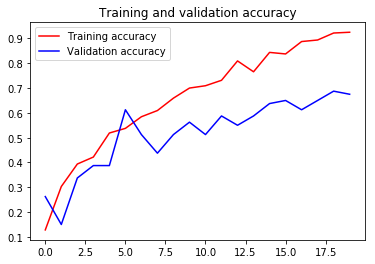

<Figure size 432x288 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()